In [194]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [195]:
paths = []
labels = []

for dirname, _, filenames in os.walk(r'/content/drive/MyDrive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
print('DataSet is Loaded')


DataSet is Loaded


In [196]:
paths[:6]

['/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_chief_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_cheek_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_chair_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_cause_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_chain_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_check_angry.wav']

In [197]:
labels[:6]

['angry', 'angry', 'angry', 'angry', 'angry', 'angry']

In [198]:
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS Toronto emotional ...,angry
1,/content/drive/MyDrive/TESS Toronto emotional ...,angry
2,/content/drive/MyDrive/TESS Toronto emotional ...,angry
3,/content/drive/MyDrive/TESS Toronto emotional ...,angry
4,/content/drive/MyDrive/TESS Toronto emotional ...,angry


In [199]:
df['label'].value_counts()

angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: label, dtype: int64

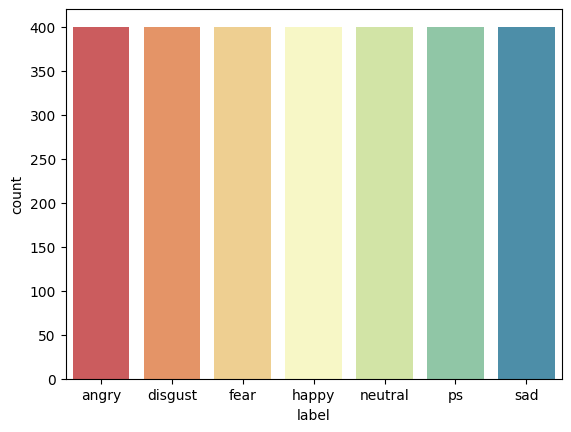

In [200]:
sns.countplot(data = df, x = 'label',palette = 'Spectral');

In [201]:
def waveplot(data, sr, emotion):
    plt.figure(figsize = (10,4))
    plt.title(emotion, size = 20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()


def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize = (11,4))
    plt.title(emotion, size = 20)
    librosa.display.specshow(xdb, sr = sr, x_axis = 'time', y_axis = 'hz' )
    plt.colorbar()


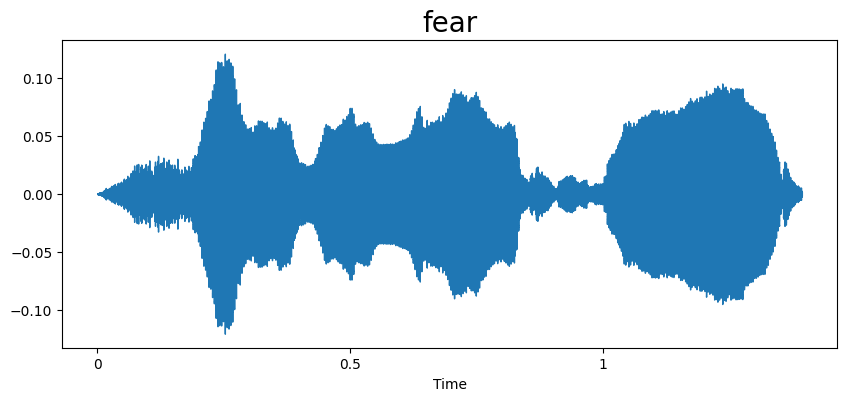

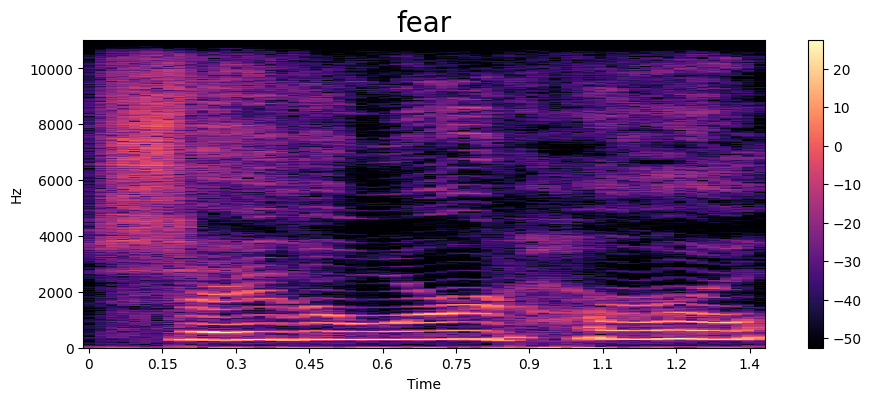

In [202]:
emotion ='fear'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

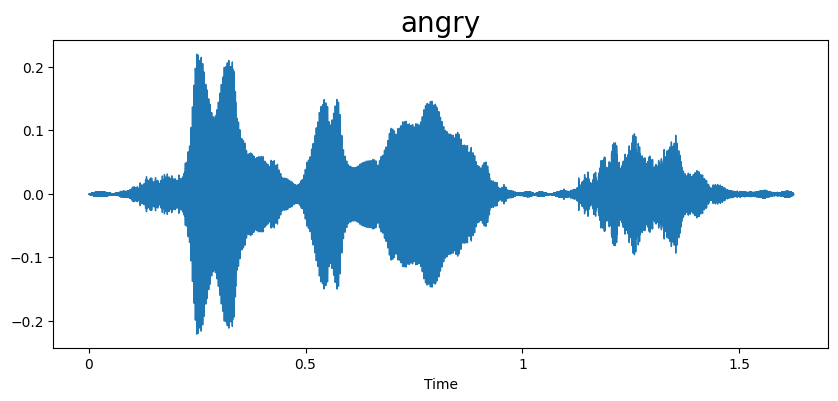

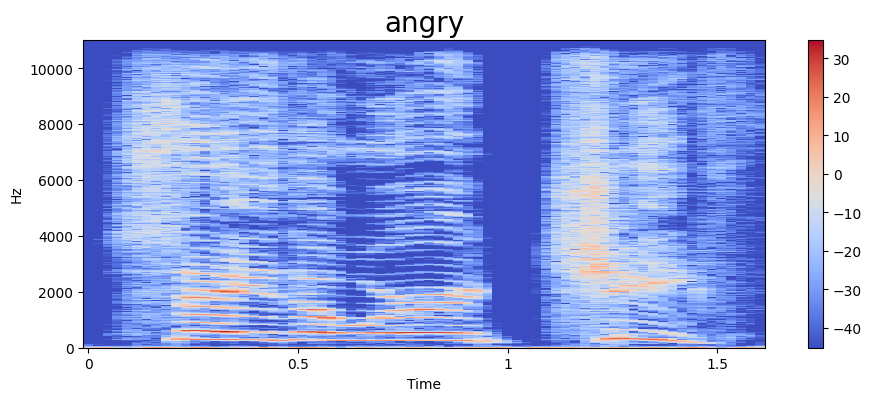

In [203]:
emotion ='angry'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

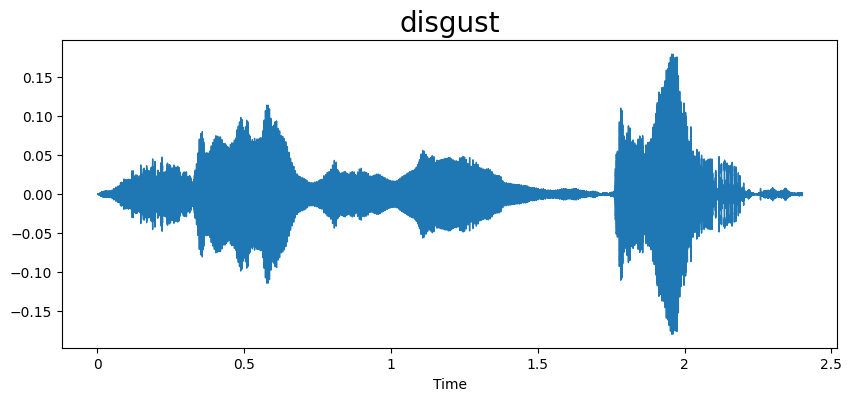

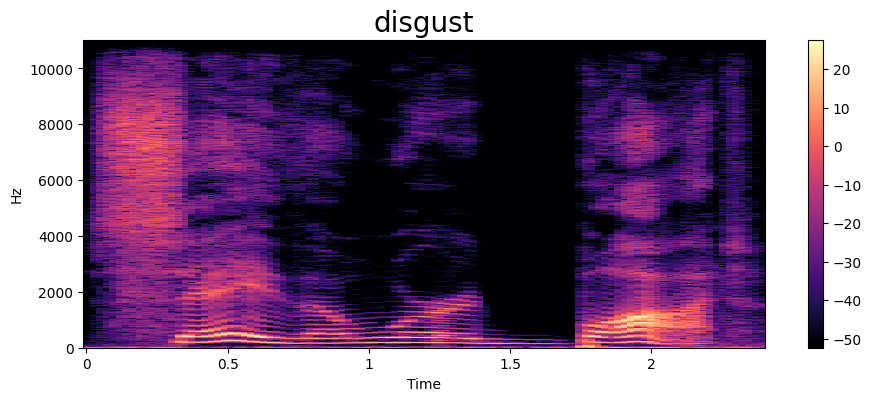

In [204]:
emotion ='disgust'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

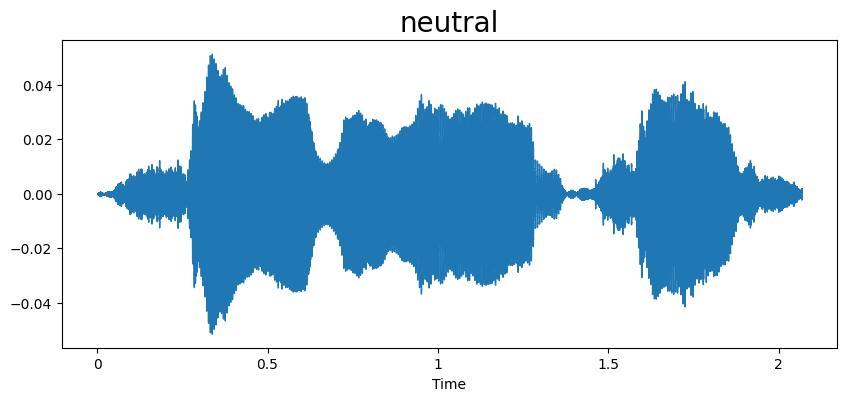

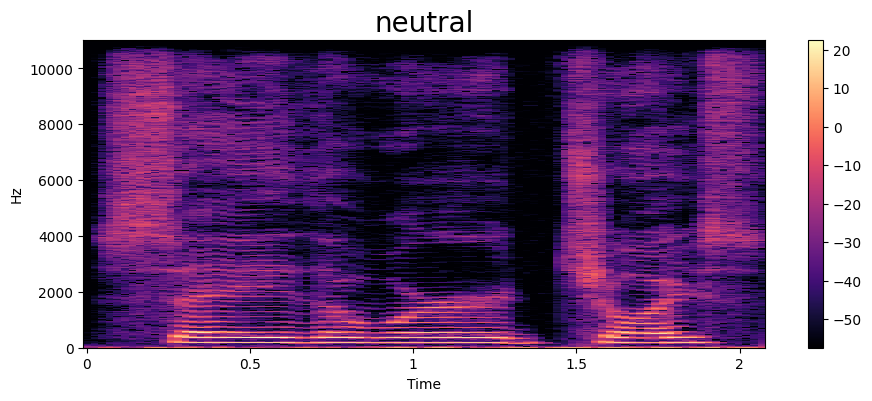

In [205]:
emotion ='neutral'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

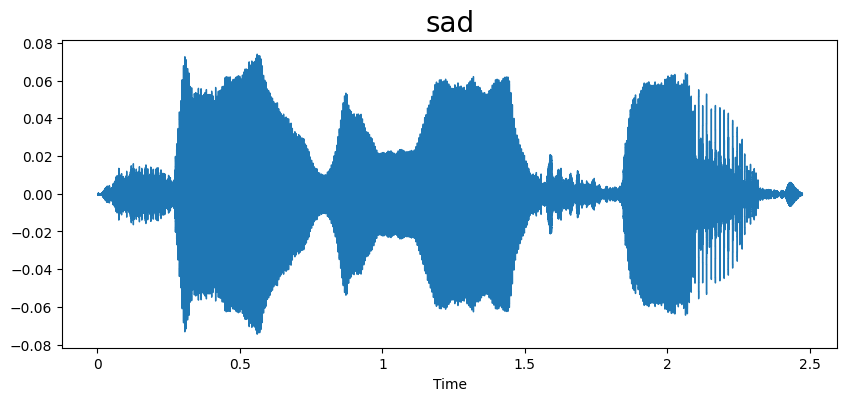

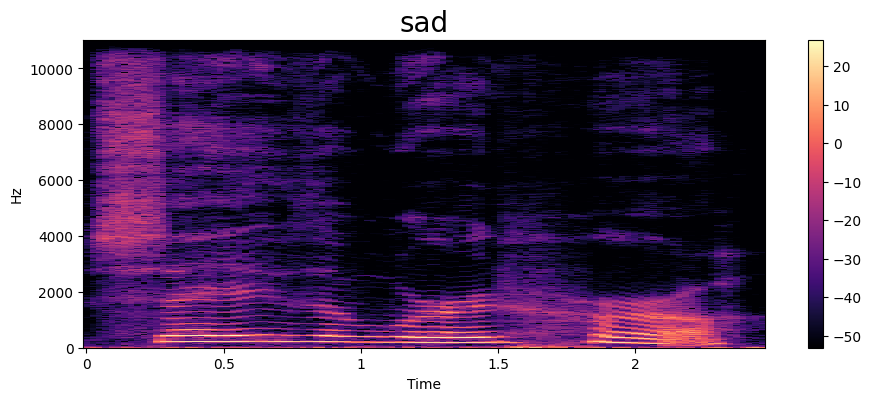

In [206]:
emotion ='sad'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

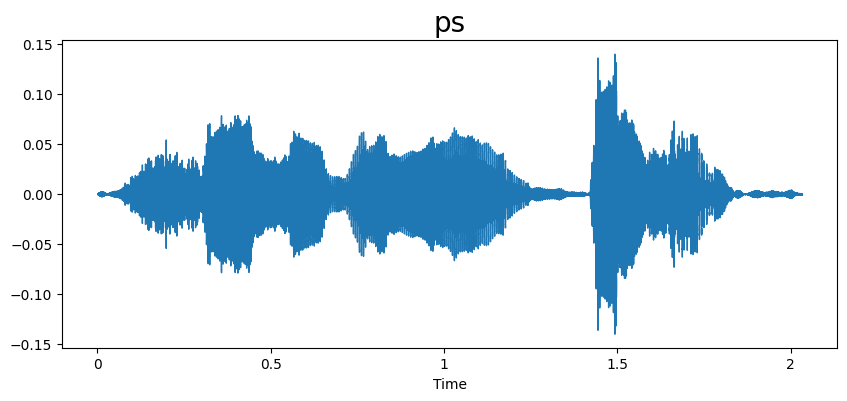

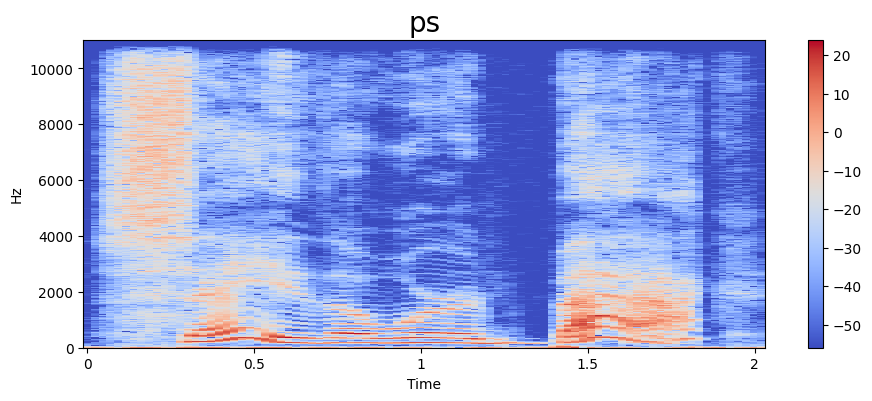

In [207]:
emotion ='ps'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

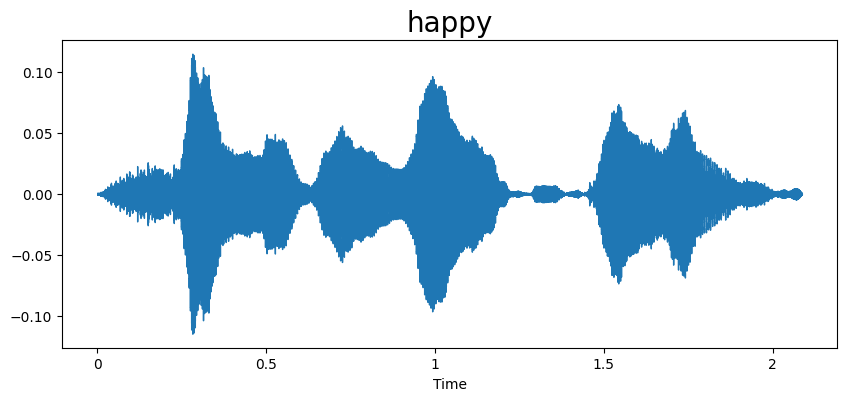

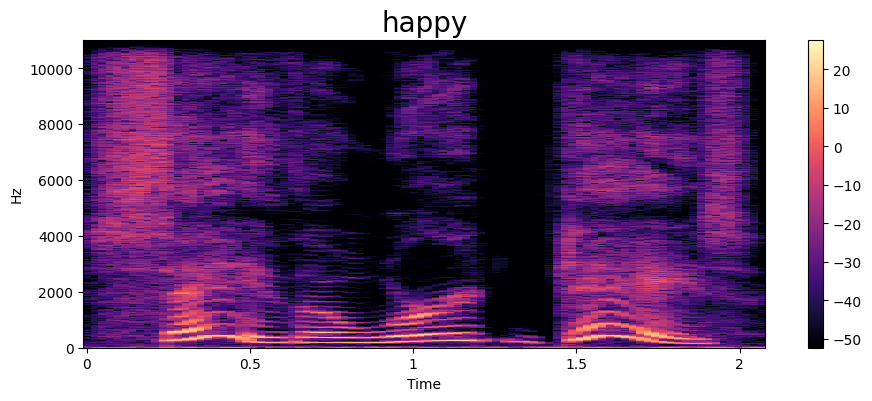

In [208]:
emotion ='happy'
path = df['speech'][df['label'] == emotion].iloc[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectrogram(data, sampling_rate, emotion)
Audio(path)

In [209]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration = 3, offset = 0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr = sr, n_mfcc = 40).T, axis = 0)
    return mfcc

In [210]:
extract_mfcc(df['speech'][0])

array([-4.1712173e+02,  3.0051937e+01, -1.3907442e+00,  6.4176693e+00,
        8.2087345e+00,  1.7724903e+00, -1.2635863e+01, -1.9164954e+00,
       -1.2061063e+01, -6.6102524e+00, -1.4330453e+01,  2.1714363e+00,
        2.2733174e-01,  9.5061570e-01, -3.6206303e+00,  6.0213909e+00,
       -1.0756634e+00, -2.4994617e+00, -5.2728319e+00, -5.6004672e+00,
        1.3192749e+00,  3.3729126e+00, -7.3164034e-01,  1.1442407e+01,
        1.7202171e+01,  2.6545523e+01,  2.0421747e+01,  1.9164240e+01,
        4.8134098e+00,  3.1841612e+00,  1.8658533e+00,  6.9054947e+00,
        1.0644054e+01, -5.8846766e-01, -4.0233436e+00,  1.1734182e+00,
        2.9551454e+00,  7.7805524e+00, -1.1734414e+00,  1.3731154e+00],
      dtype=float32)

In [211]:
x_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [212]:
x_mfcc

0       [-417.12173, 30.051937, -1.3907442, 6.4176693,...
1       [-493.29926, 44.551025, 2.298769, 15.117727, 7...
2       [-405.9769, 62.242702, -12.048751, -14.658479,...
3       [-445.09525, 69.13117, -9.402366, -17.480684, ...
4       [-381.63486, 62.26355, -13.286342, 8.571052, -...
                              ...                        
2795    [-408.7531, 75.77113, 31.531439, 32.01249, -0....
2796    [-408.487, 85.71621, 21.654655, 36.951283, -6....
2797    [-430.72708, 105.83536, 26.838194, 26.281273, ...
2798    [-415.01706, 94.46483, 22.644314, 39.84547, 4....
2799    [-391.7009, 105.86358, 24.74221, 39.54729, -5....
Name: speech, Length: 2800, dtype: object

In [213]:
x = [x for x in x_mfcc]
x = np.array(x)
x.shape

(2800, 40)

In [214]:
x = np.expand_dims(x, -1)
x.shape

(2800, 40, 1)

In [215]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [216]:
y = y.toarray()

In [217]:
y.shape

(2800, 7)

In [218]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(123, return_sequences = False, input_shape=(40,1)),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dropout(0.2),
    Dense(7, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 123)               61500     
                                                                 
 dense_12 (Dense)            (None, 64)                7936      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 7174

In [219]:
history = model.fit(x,y, validation_split= 0.2, epochs = 100, batch_size =512, shuffle = True)

Epoch 1/100
5/5 [==============================] - 3s 262ms/step - loss: 1.9215 - accuracy: 0.2527 - val_loss: 1.9408 - val_accuracy: 0.2661
Epoch 2/100
5/5 [==============================] - 1s 174ms/step - loss: 1.7654 - accuracy: 0.4388 - val_loss: 1.8980 - val_accuracy: 0.2696
Epoch 3/100
5/5 [==============================] - 1s 162ms/step - loss: 1.5871 - accuracy: 0.5165 - val_loss: 1.9106 - val_accuracy: 0.2750
Epoch 4/100
5/5 [==============================] - 1s 178ms/step - loss: 1.3319 - accuracy: 0.5737 - val_loss: 1.9787 - val_accuracy: 0.2839
Epoch 5/100
5/5 [==============================] - 1s 233ms/step - loss: 1.0973 - accuracy: 0.6205 - val_loss: 2.0629 - val_accuracy: 0.2839
Epoch 6/100
5/5 [==============================] - 1s 231ms/step - loss: 0.9480 - accuracy: 0.6683 - val_loss: 2.0785 - val_accuracy: 0.2821
Epoch 7/100
5/5 [==============================] - 1s 184ms/step - loss: 0.8188 - accuracy: 0.7058 - val_loss: 2.0667 - val_accuracy: 0.2982
Epoch 8/100
5

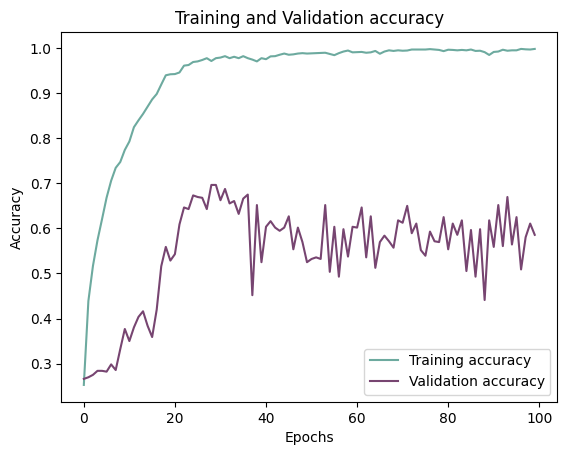

In [225]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#774571", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

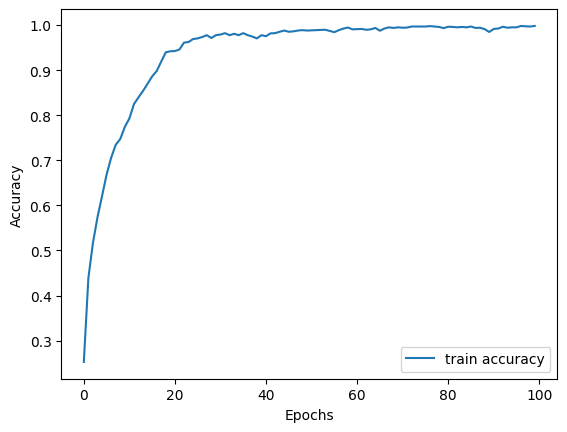

In [226]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label = 'train accuracy', )
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [227]:
acc = history.history['accuracy']
mean_accuracy = sum(acc)/len(acc)
mean_accuracy*100

93.74910727143288